**Gerekli olan BRISQUE kütüphanesi yüklendi.**

In [3]:
pip install scikit-image opencv-python brisque


**Test edeceğimiz kombinasyonlarımızın fonksiyonları**

In [1]:
import cv2
import numpy as np
def process_image_5(image):
    # Adım 1: L1 Normalizasyon
    norm_image = image.astype(np.float32) / (np.sum(np.abs(image)) + 1e-8)
    norm_image = cv2.normalize(norm_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

    # Adım 2: Bilateral Filtreleme
    filtered_image = cv2.bilateralFilter(norm_image, d=9, sigmaColor=75, sigmaSpace=75)

    # Adım 3: Sharpening
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(filtered_image, -1, kernel)

    # Adım 4: Gamma Dönüşümü
    gamma = 1.5
    gamma_corrected = np.clip(255 * ((sharpened_image / 255) ** gamma), 0, 255).astype('uint8')

    return gamma_corrected


def process_image_8(image):
    # Adım 1: Min-Max Normalizasyon
    norm_image = cv2.normalize(image.astype(np.float32), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    norm_image = norm_image.astype(np.uint8)

    # Adım 2: Adaptive Median Filtreleme
    # Adaptive median OpenCV'de yerleşik bir fonksiyon olmadığı için normal median kullanıyoruz.
    filtered_image = cv2.medianBlur(norm_image, 5)

    # Adım 3: Unsharp Masking (Keskinleştirme)
    gaussian_blur = cv2.GaussianBlur(filtered_image, (9, 9), 10.0)
    sharpened_image = cv2.addWeighted(filtered_image, 1.5, gaussian_blur, -0.5, 0)

    # Adım 4: Gamma Dönüşümü
    gamma = 1.8
    gamma_corrected = np.array(255 * ((sharpened_image / 255) ** gamma), dtype='uint8')

    return gamma_corrected

def process_image_9(image):
    # Adım 1: L1 Normalizasyon
    norm_image = image.astype(np.float32) / (np.sum(np.abs(image)) + 1e-8)
    norm_image = cv2.normalize(norm_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

    # Adım 2: Bilateral Filtreleme
    filtered_image = cv2.bilateralFilter(norm_image, d=9, sigmaColor=75, sigmaSpace=75)

    # Adım 3: Sharpening (Keskinleştirme)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(filtered_image, -1, kernel)

    # Adım 4: CLAHE Histogram Eşitleme
    if len(image.shape) == 2:  # Grayscale
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        final_image = clahe.apply(sharpened_image)
    else:  # Color
        ycrcb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2YCrCb)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        ycrcb[:, :, 0] = clahe.apply(ycrcb[:, :, 0])
        final_image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

    return final_image



def process_image_13(image):
    # Adım 1: L1 Normalizasyon
    norm_image = image.astype(np.float32) / (np.sum(np.abs(image)) + 1e-8)
    norm_image = cv2.normalize(norm_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

    # Adım 2: Adaptive Median Filtreleme (Approximation)
    # OpenCV'de direkt adaptive median yok, burada `medianBlur` ile temsil ediliyor.
    filtered_image = cv2.medianBlur(norm_image, 5)

    # Adım 3: Unsharp Masking (Keskinleştirme)
    gaussian_blur = cv2.GaussianBlur(filtered_image, (9, 9), 10.0)
    sharpened_image = cv2.addWeighted(filtered_image, 1.5, gaussian_blur, -0.5, 0)

    # Adım 4: Histogram Eşitleme
    if len(image.shape) == 2:  # Grayscale
        final_image = cv2.equalizeHist(sharpened_image)
    else:  # Color
        ycrcb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        final_image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

    return final_image



def process_image_17(image):
    # Step 1: L1 Normalization
    norm_image = image.astype(np.float32) / (np.sum(np.abs(image)) + 1e-8)
    norm_image = cv2.normalize(norm_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

    # Step 2: Mean Filtering
    kernel = np.ones((3, 3), np.float32) / 9
    filtered_image = cv2.filter2D(norm_image, -1, kernel)

    # Step 3: Sobel Sharpening
    sobelx = cv2.Sobel(filtered_image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(filtered_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sharpened_image = cv2.convertScaleAbs(sobel_combined)

    # Step 4: Gamma Transformation
    gamma = 1.8
    gamma_corrected = np.clip(255 * ((sharpened_image / 255) ** gamma), 0, 255).astype('uint8')

    return gamma_corrected

def process_image_18(image):
    # Step 1: L2 Normalization
    norm_image = image.astype(np.float32) / (np.sqrt(np.sum(np.square(image))) + 1e-8)
    norm_image = cv2.normalize(norm_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

    # Step 2: Gaussian Filtering
    filtered_image = cv2.GaussianBlur(norm_image, (5, 5), 0)

    # Step 3: Unsharp Masking (Sharpening)
    gaussian_blur = cv2.GaussianBlur(filtered_image, (9, 9), 10.0)
    sharpened_image = cv2.addWeighted(filtered_image, 1.5, gaussian_blur, -0.5, 0)

    # Step 4: CLAHE Histogram Equalization
    if len(image.shape) == 2:  # Grayscale
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        final_image = clahe.apply(sharpened_image)
    else:  # Color
        ycrcb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2YCrCb)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        ycrcb[:, :, 0] = clahe.apply(ycrcb[:, :, 0])
        final_image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

    return final_image



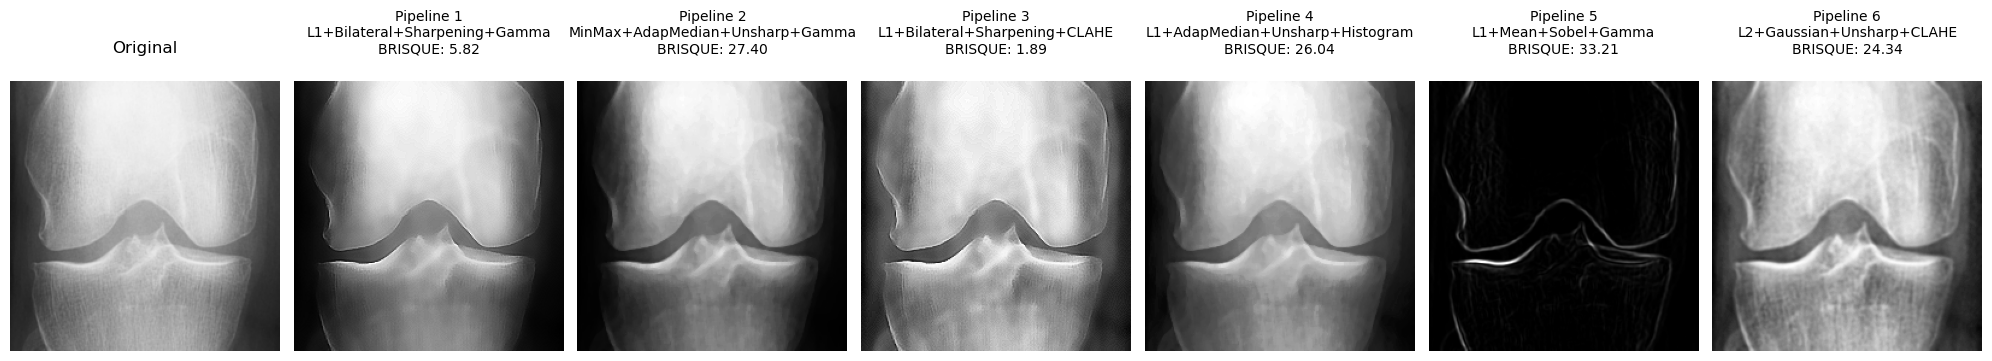

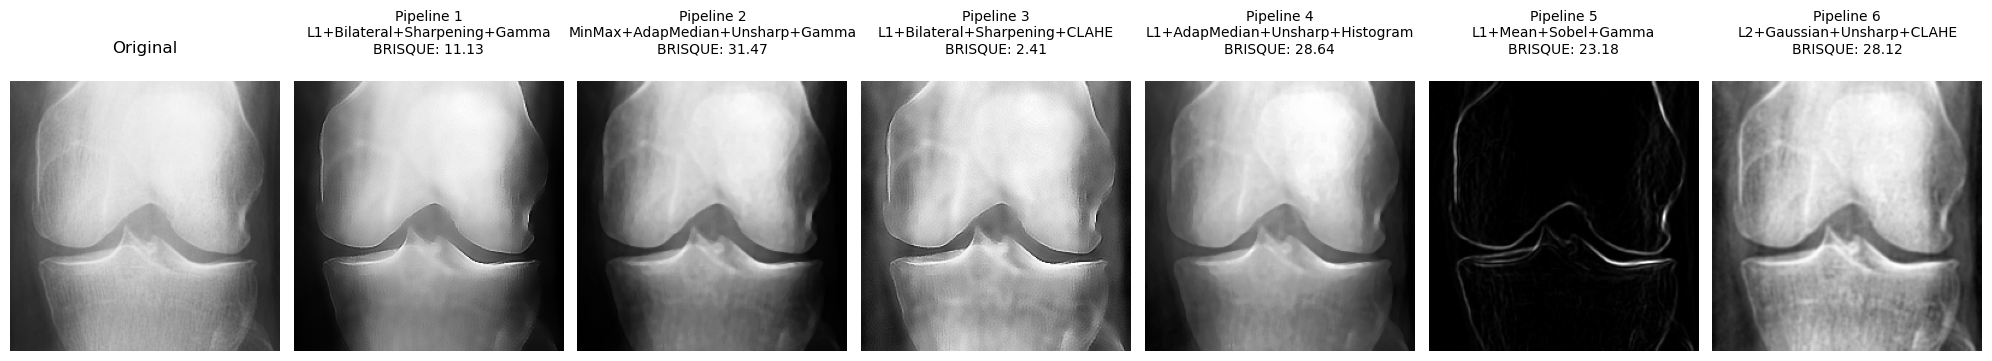

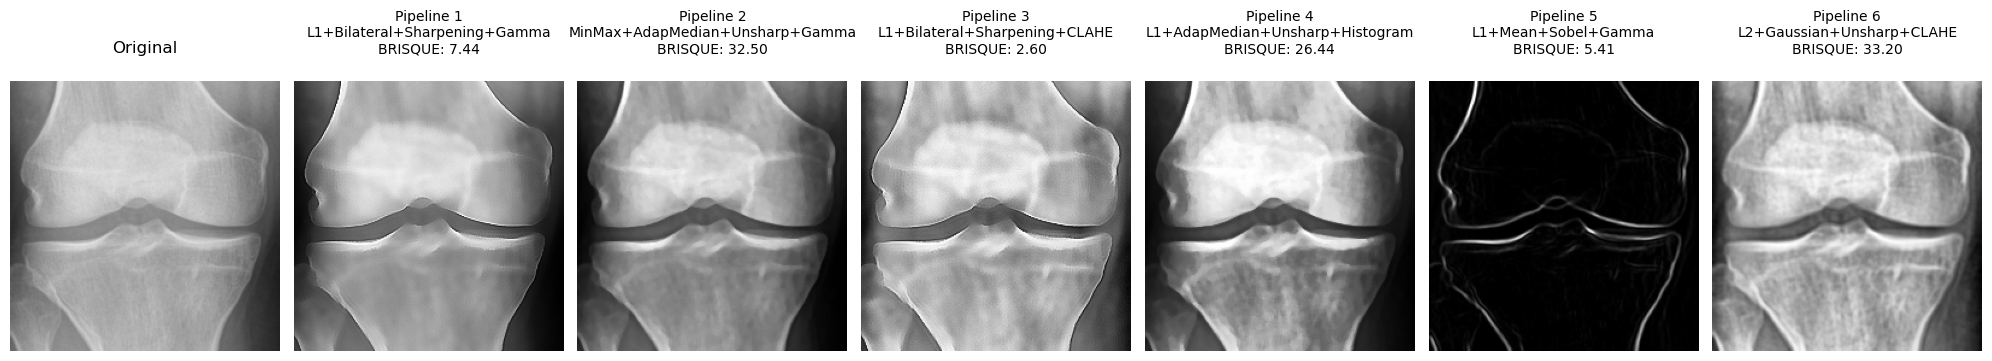

In [2]:
import cv2
import matplotlib.pyplot as plt
from brisque import BRISQUE

def calculate_brisque_score(image):
    brisque = BRISQUE()
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    score = brisque.score(image_rgb)
    return score

def display_pipelines_with_brisque(image, pipeline_images):
    # Görsellerin daha büyük görünmesi için figsize değerini artırıyoruz
    plt.figure(figsize=(20, 12))

    # İlk sütunda orijinal görseli gösteriyoruz
    plt.subplot(1, len(pipeline_images) + 1, 1)  # 1 satır, len(pipeline_images) + 1 sütun
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Orijinal görüntü
    plt.axis('off')
    plt.title(f"Original", fontsize=12, pad=20)

    # Diğer sütunlarda işlenmiş görselleri gösteriyoruz
    for i, (processed_image, pipeline_num, pipeline_name) in enumerate(pipeline_images):
        score = calculate_brisque_score(processed_image)
        
        plt.subplot(1, len(pipeline_images) + 1, i + 2)  # İşlenmiş görsellerin sütunları
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        
        # Başlıkların tamamını göstermek için çok satırlı başlık ekledik
        plt.title(f"{pipeline_num}\n{pipeline_name}\nBRISQUE: {score:.2f}", fontsize=10, pad=20)

    # Görseller arasındaki boşluğu artırmak ve başlıkları düzgün yerleştirmek için tight_layout kullanıyoruz
    plt.tight_layout(pad=1.0)
    plt.show()

# Görsellerin yolunu ve orijinal resmi yükleyelim
imagenormal1 = r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(9).png"
image1 = cv2.imread(imagenormal1, cv2.IMREAD_COLOR)
imagenormal2 = r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(8).png"
image2 = cv2.imread(imagenormal2, cv2.IMREAD_COLOR)
imagenormal3 = r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(3).png"
image3 = cv2.imread(imagenormal3, cv2.IMREAD_COLOR)

# Kullanım örneği
pipeline_images1 = [
    (process_image_5(image1), "Pipeline 1","L1+Bilateral+Sharpening+Gamma"),
    (process_image_8(image1), "Pipeline 2","MinMax+AdapMedian+Unsharp+Gamma"),
    (process_image_9(image1), "Pipeline 3","L1+Bilateral+Sharpening+CLAHE"),
    (process_image_13(image1), "Pipeline 4","L1+AdapMedian+Unsharp+Histogram"),
    (process_image_17(image1), "Pipeline 5","L1+Mean+Sobel+Gamma"),
    (process_image_18(image1), "Pipeline 6","L2+Gaussian+Unsharp+CLAHE"),
]
pipeline_images2 = [
    (process_image_5(image2), "Pipeline 1","L1+Bilateral+Sharpening+Gamma"),
    (process_image_8(image2), "Pipeline 2","MinMax+AdapMedian+Unsharp+Gamma"),
    (process_image_9(image2), "Pipeline 3","L1+Bilateral+Sharpening+CLAHE"),
    (process_image_13(image2), "Pipeline 4","L1+AdapMedian+Unsharp+Histogram"),
    (process_image_17(image2), "Pipeline 5","L1+Mean+Sobel+Gamma"),
    (process_image_18(image2), "Pipeline 6","L2+Gaussian+Unsharp+CLAHE"),
]
pipeline_images3 = [
    (process_image_5(image3), "Pipeline 1","L1+Bilateral+Sharpening+Gamma"),
    (process_image_8(image3), "Pipeline 2","MinMax+AdapMedian+Unsharp+Gamma"),
    (process_image_9(image3), "Pipeline 3","L1+Bilateral+Sharpening+CLAHE"),
    (process_image_13(image3), "Pipeline 4","L1+AdapMedian+Unsharp+Histogram"),
    (process_image_17(image3), "Pipeline 5","L1+Mean+Sobel+Gamma"),
    (process_image_18(image3), "Pipeline 6","L2+Gaussian+Unsharp+CLAHE"),
]

# Orijinal ve işlenmiş görselleri aynı anda görüntüle
display_pipelines_with_brisque(image1, pipeline_images1)
display_pipelines_with_brisque(image2, pipeline_images2)
display_pipelines_with_brisque(image3, pipeline_images3)

BRISQUE skoru 0'a ne kadar yakınsa görüntü o kadar kalitelidir. Bu sebeple seçtiğimiz kombinasyon **L1 + Bilateral + Sharpening + CLAHE**

**Seçilen kombinasyon görseller üzerinde uygulandı ve çıktılar kaydedildi**

In [52]:
import cv2
import numpy as np
import os

def process_image_9(image, output_path):
    # Adım 1: L1 Normalizasyon
    norm_image = image.astype(np.float32) / (np.sum(np.abs(image)) + 1e-8)
    norm_image = cv2.normalize(norm_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.uint8)

    # Adım 2: Bilateral Filtreleme
    filtered_image = cv2.bilateralFilter(norm_image, d=9, sigmaColor=75, sigmaSpace=75)

    # Adım 3: Sharpening (Keskinleştirme)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(filtered_image, -1, kernel)

    # Adım 4: CLAHE Histogram Eşitleme
    if len(image.shape) == 2:  # Grayscale
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        final_image = clahe.apply(sharpened_image)
    else:  # Color
        ycrcb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2YCrCb)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        ycrcb[:, :, 0] = clahe.apply(ycrcb[:, :, 0])
        final_image = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

    # Resmi kaydet
    cv2.imwrite(output_path, final_image)
    
    return final_image

def process_multiple_images(image_list, output_folder):
    # Eğer klasör mevcut değilse oluştur
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Output folder created: {output_folder}")

    for image_path in image_list:
        image = cv2.imread(image_path)
        
        # Dosya ismini ve uzantıyı ayırarak, orijinal isimle kaydetme
        image_name = os.path.basename(image_path)  # Resmin ismini al
        output_path = os.path.join(output_folder, image_name)  # Orijinal isimle kaydet
        
        processed_image = process_image_9(image, output_path)
        print(f"Processed image saved at: {output_path}")

# Kullanım örneği
image_list = [
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(1).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(2).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(3).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(4).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(5).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(6).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(7).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(8).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(9).png",
    r"C:\Users\Eren\Desktop\zzzzzzzzzz\DB\image(10).png",
    # Diğer resim yollarını ekleyebilirsiniz
]

output_folder = r"C:\Users\Eren\Desktop\processed_images"  # Çıktıların kaydedileceği klasör
process_multiple_images(image_list, output_folder)


Output folder created: C:\Users\Eren\Desktop\processed_images
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(1).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(2).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(3).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(4).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(5).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(6).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(7).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(8).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(9).png
Processed image saved at: C:\Users\Eren\Desktop\processed_images\image(10).png
